In [1]:
import geoip2.database
import csv
from multiaddr import Multiaddr
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style("darkgrid")
sns.set()

PEERS_CVS = "2021-07-14T1924-peers-filecoin.csv"

In [3]:
def node_address(maddr):
    try:
        return maddr.value_for_protocol(0x04)
    except:
        pass
    return maddr.value_for_protocol(0x29)

def parse_maddr_str(maddr_str):
    """
    The following line parses a row like:
      {/ip6/::/tcp/37374,/ip4/151.252.13.181/tcp/37374}
    into
      ['/ip6/::/tcp/37374', '/ip4/151.252.13.181/tcp/37374']
    """
    return maddr_str.replace("{", "").replace("}", "").split(",")

In [4]:
result = {}
with geoip2.database.Reader('./GeoLite2/GeoLite2-Country.mmdb') as geoipreader:
    with open(PEERS_CVS) as csvfile:
        csvreader = csv.DictReader(csvfile, delimiter=",")
        for row in csvreader:
            maddr_strs = parse_maddr_str(row["multi_addresses"])
            found = False
            for maddr_str in maddr_strs:
                maddr = Multiaddr(maddr_str)
                address = node_address(maddr)
                try:
                    iso_code = geoipreader.country(address).country.iso_code;
                    if iso_code in result:
                        result[iso_code] += 1
                    else:
                        result[iso_code] = 1
                    found = True
                    break
                except:
                    pass
            if not found:
                print("Unknown: ", maddr_strs)
print(result)

{'NO': 4, 'SI': 3, 'HK': 65, 'US': 152, 'CN': 2027, 'SE': 6, 'FR': 9, 'SG': 15, 'KR': 417, 'JP': 13, 'CA': 20, 'DE': 24, 'LV': 2, 'GB': 8, 'UA': 11, 'PL': 2, 'RU': 14, 'ES': 2, 'TW': 6, 'NL': 13, 'IR': 1, 'BE': 4, 'BY': 1, 'MY': 3, 'DK': 2, 'NZ': 2, 'TH': 2, 'CH': 1, 'BG': 7, 'AU': 3, 'CZ': 2, 'VN': 1}


[]

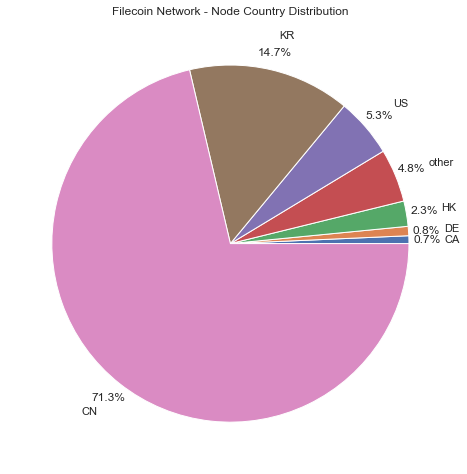

In [7]:
pie_data = {"other": 0}
threshold = 20
for key in result:
    if result[key] < threshold:
        pie_data["other"] += result[key]
        continue
    
    pie_data[key] = result[key]

values, labels = zip(*sorted(zip(pie_data.values(), pie_data.keys())))

plt.figure(figsize=(8, 18))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=0, pctdistance=1.1, labeldistance=1.2)
plt.title("Filecoin Network - Node Country Distribution")
plt.tightlayout()
plt.plot()